In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2
from skimage.feature import hog

In [43]:
def showImage(image, title=None):
    """
    Showing custom image with title
    :param image: Custom image
    :param title: Custom title
    :return: Image plot with title
    """
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [44]:
originalImage = cv2.imread("images\\photo.jpg", 0)
cropImage = originalImage[200:450, 350:650]

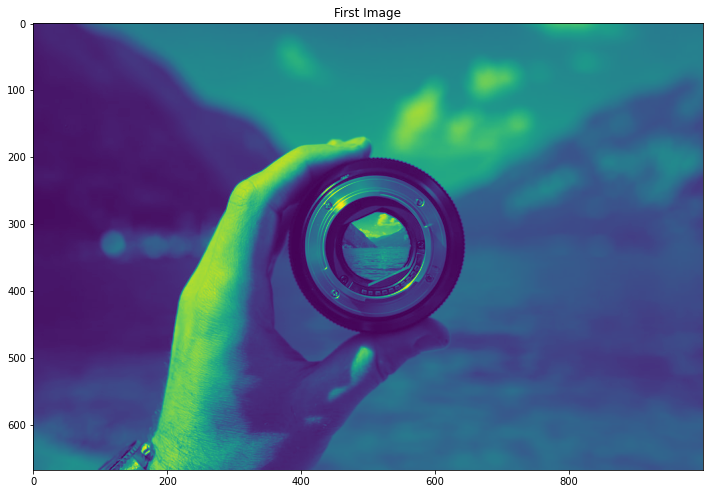

In [37]:
showImage(originalImage, 'First Image')

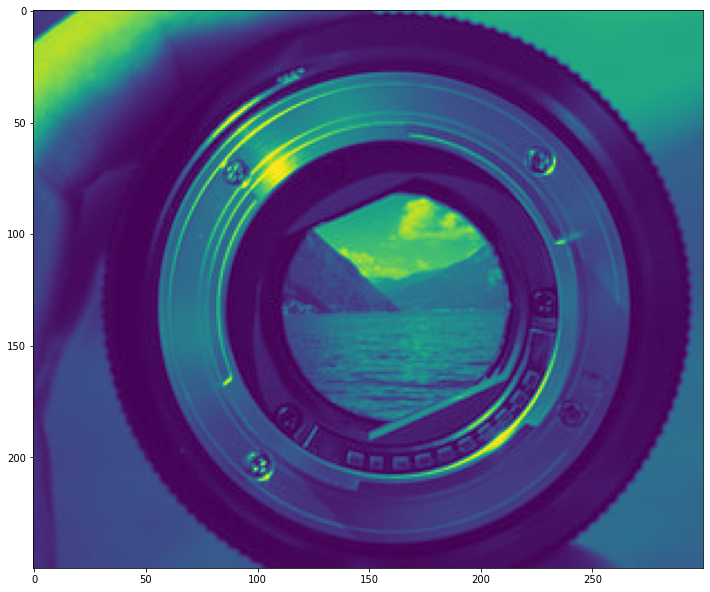

In [40]:
showImage(cropImage)

In [45]:
def matcher(desc1, desc2):
    """
    Own matcher function
    :param desc1: Descriptor for the first image
    :param desc2: Descriptor for the second image
    :return: Sorted by distance array of matches
    """
    matches = []
    for queryIndex, desc1_value in enumerate(desc1):
        for trainIndex, desc2_value in enumerate(desc2):
            matches.append(
                cv2.DMatch(
                    _distance=int(np.linalg.norm(desc1_value - desc2_value)),
                    _queryIdx=queryIndex,
                    _trainIdx=trainIndex
                )
            )
    return sorted(matches, key=lambda x: x.distance)

In [46]:
def bruteForceMatcher(desc1, desc2):
    """
    Built-in openCV matcher
    :param desc1: Descriptor for the first image
    :param desc2: Descriptor for the second image
    :return: Sorted by distance array of matches
    """
    bf = cv2.BFMatcher (cv2.NORM_L2, crossCheck=True)
    matches = bf.match(desc1, desc2)
    return sorted(matches, key=lambda x: x.distance)

In [47]:
def sift(img1, img2):
    """
    Built-in opencv SIFT
    :param img1: First image
    :param img2: Second image
    :return: Keypoints and descriptors for two images
    """
    sift = cv2.SIFT_create()
    kp1, desc1 = sift.detectAndCompute(img1, None)
    kp2, desc2 = sift.detectAndCompute(img2, None)
    return kp1, desc1, kp2, desc2

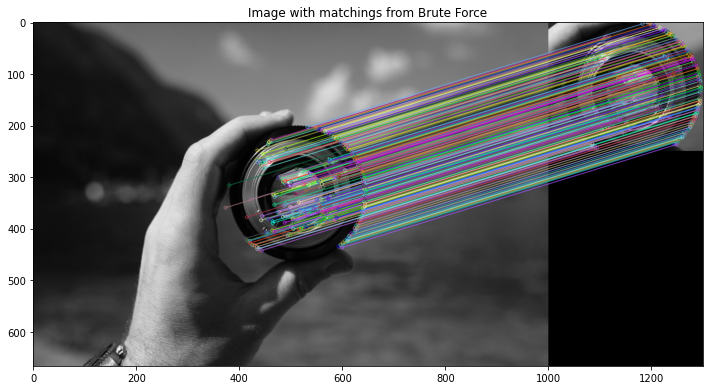

In [51]:
kp1, desc1, kp2, desc2 = sift(originalImage, cropImage)
bfMatches = bruteForceMatcher(desc1, desc2)
bfMatchImage = cv2.drawMatches(originalImage, kp1, cropImage, kp2, bfMatches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
showImage(bfMatchImage, 'Image with matchings from Brute Force')

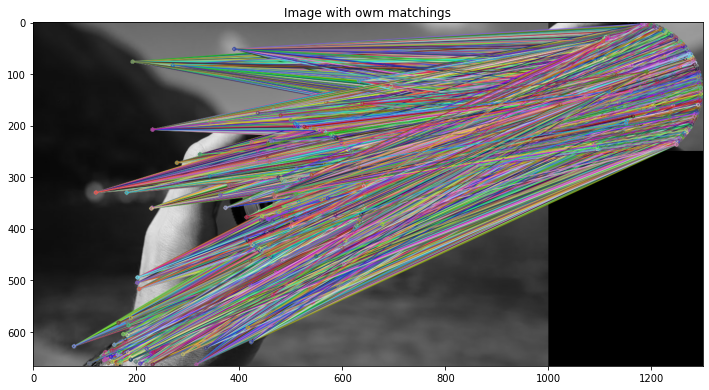

In [52]:
matches = matcher(desc1, desc2)
matchImage = cv2.drawMatches(originalImage, kp1, cropImage, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
showImage(matchImage, 'Image with own matchings')

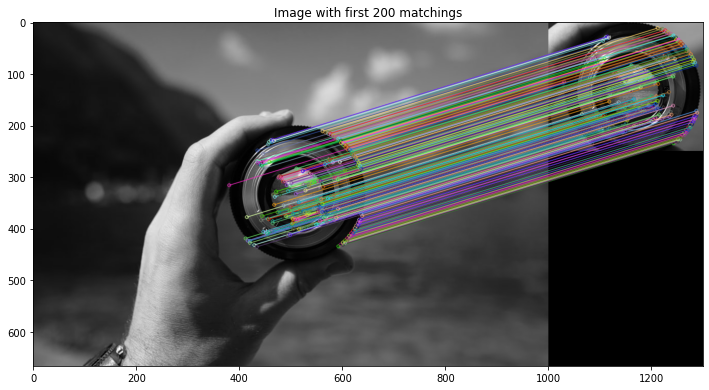

In [58]:
lessMatchImage = cv2.drawMatches(originalImage, kp1, cropImage, kp2, matches[:200], None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
showImage(lessMatchImage, 'Image with first 200 own matchings')

In [60]:
# Saving pictures
cv2.imwrite('images\\BruteForce image.jpg', bfMatchImage)
cv2.imwrite('images\\Own image.jpg', lessMatchImage)

True